# Genomic data exploration

Goal = compute similarity distribution

## First exploration

In [40]:
import pandas as pd
import vcf

from pprint import pprint

In [28]:
i = 0
vcf_reader = vcf.Reader(filename='Data/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz',compressed=True)

In [29]:
for rec in vcf_reader:
    if i > 2:
        break
    print("######")
    pprint({
        "CHROM": rec.CHROM, 
        "POS": rec.POS, 
        "ID": rec.ID, 
        "REF": rec.REF, 
        "ALT": rec.ALT, 
        "QUAL": rec.QUAL, 
        "FILTER": rec.FILTER,
        "INFO": rec.INFO,
        "FORMAT": rec.FORMAT
        })
    print("######")
    i += 1

######
{'ALT': [C],
 'CHROM': '22',
 'FILTER': [],
 'FORMAT': 'GT:DS:GL',
 'ID': 'rs149201999',
 'INFO': {'AA': None,
          'AC': [134],
          'AF': 0.06,
          'AFR_AF': 0.1,
          'AMR_AF': 0.05,
          'AN': 2184,
          'ASN_AF': 0.04,
          'AVGPOST': 0.9799,
          'ERATE': 0.0046,
          'EUR_AF': 0.06,
          'LDAF': 0.0649,
          'RSQ': 0.8652,
          'SNPSOURCE': ['LOWCOV'],
          'THETA': 0.0149,
          'VT': 'SNP'},
 'POS': 16050408,
 'QUAL': 100,
 'REF': 'T'}
######
######
{'ALT': [G],
 'CHROM': '22',
 'FILTER': [],
 'FORMAT': 'GT:DS:GL',
 'ID': 'rs146752890',
 'INFO': {'AA': None,
          'AC': [184],
          'AF': 0.08,
          'AFR_AF': 0.08,
          'AMR_AF': 0.14,
          'AN': 2184,
          'ASN_AF': 0.08,
          'AVGPOST': 0.964,
          'ERATE': 0.0031,
          'EUR_AF': 0.07,
          'LDAF': 0.0902,
          'RSQ': 0.8228,
          'SNPSOURCE': ['LOWCOV'],
          'THETA': 0.0127,
          

In [48]:
import gzip
import re
from pprint import pprint

In [4]:
with gzip.open('Data/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz', 'rb') as f:
    i = 0
    for l in f:
        if i > 29:
            s = l.decode('utf8')
            s1,s2 = retrievePosition(s)
            print("###")
            print(s1)
            print(s2)
        if i==31:
            break
        i += 1

###
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 

In [60]:
regex = "([01])\|([01])"
test = ['C',
 'G',
 '100',
 'PASS',
 'AC=184;RSQ=0.8228;AVGPOST=0.9640;AN=2184;ERATE=0.0031;VT=SNP;AA=.;THETA=0.0127;LDAF=0.0902;SNPSOURCE=LOWCOV;AF=0.08;ASN_AF=0.08;AMR_AF=0.14;AFR_AF=0.08;EUR_AF=0.07',
 'GT:DS:GL',
 '0|1:1.000:-2.05,-0.01,-1.71',
 '0|1:1.000:-0.86,-0.06,-5.00',
 '0|1:1.000:-5.00,0.00,-5.00',
 '0|0:0.000:-0.18,-0.47,-2.16',
 '0|1:1.000:-2.11,-0.02,-1.41',
 '0|0:0.400:-0.08,-0.76,-5.00']

In [61]:
p = re.compile(regex)

In [64]:
for t in test:
    m = p.match(t)
    print(m)
    if m:
        print(m.group(1), m.group(2))

None
None
None
None
None
None
<_sre.SRE_Match object; span=(0, 3), match='0|1'>
0 1
<_sre.SRE_Match object; span=(0, 3), match='0|1'>
0 1
<_sre.SRE_Match object; span=(0, 3), match='0|1'>
0 1
<_sre.SRE_Match object; span=(0, 3), match='0|0'>
0 0
<_sre.SRE_Match object; span=(0, 3), match='0|1'>
0 1
<_sre.SRE_Match object; span=(0, 3), match='0|0'>
0 0


In [4]:
with gzip.open('Data/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz', 'rb') as f:
    i = 0
    for l in f:
        print(l.decode('utf-8'))
        i+=1
        if i > 30:
            break
            

##fileformat=VCFv4.1

##INFO=<ID=LDAF,Number=1,Type=Float,Description="MLE Allele Frequency Accounting for LD">

##INFO=<ID=AVGPOST,Number=1,Type=Float,Description="Average posterior probability from MaCH/Thunder">

##INFO=<ID=RSQ,Number=1,Type=Float,Description="Genotype imputation quality from MaCH/Thunder">

##INFO=<ID=ERATE,Number=1,Type=Float,Description="Per-marker Mutation rate from MaCH/Thunder">

##INFO=<ID=THETA,Number=1,Type=Float,Description="Per-marker Transition rate from MaCH/Thunder">

##INFO=<ID=CIEND,Number=2,Type=Integer,Description="Confidence interval around END for imprecise variants">

##INFO=<ID=CIPOS,Number=2,Type=Integer,Description="Confidence interval around POS for imprecise variants">

##INFO=<ID=END,Number=1,Type=Integer,Description="End position of the variant described in this record">

##INFO=<ID=HOMLEN,Number=.,Type=Integer,Description="Length of base pair identical micro-homology at event breakpoints">

##INFO=<ID=HOMSEQ,Number=.,Type=String,Descript

## All imports

In [3]:
import gzip
import re
import pandas as pd
import numpy as np
import distance
import random

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
from pprint import pprint

from multiprocessing.dummy import Pool as ThreadPool

%matplotlib notebook

## Clean methods

In [50]:
def retrievePositions(record):
    regex = "^([01])\|([01])"
    seq1,seq2 = [],[]
    p = re.compile(regex)
    for x in record.split(sep='\t'):
        m = p.match(x)
        if m:
            seq1.append(str(m.group(1)))
            seq2.append(str(m.group(2)))
    return seq1, seq2

In [51]:
def file_len(path):
    with gzip.open(path, 'rb') as f:
        for i, _ in enumerate(f):
            pass
    return i + 1

def collectData(path):
    print("retrieving file size...")
    n = file_len(path)
    res1, res2 = np.zeros((1092, n), dtype=int), np.zeros((1092, n), dtype=int)
    print("extracting data...")
    with gzip.open(path, 'rb') as f:
        i = 0
        for l in tqdm(f,total=n):
            s = l.decode('utf8')
            s1,s2 = retrievePositions(s)
            if len(s1)+len(s2) > 0:
                for j in range(len(s1)):
                    res1[j,i] = int(s1[j])
                    res2[j,i] = int(s2[j])
                i += 1
    print("completed.")
    return res1[:,:i], res2[:,:i]

def extractData(path):
    print("retrieving file size...")
    m = file_len(path)
    print("extracting data...")
    with gzip.open(path, 'rb') as f:
        for l in f:
            break
        s = l.decode('utf8')
        n = len(s.split())
        data = np.zeros((m,n), dtype=int)
        f.seek(0)
        for i,l in tqdm(enumerate(f), total=m):
            s = l.decode('utf8')
            data[i,] = np.array(list(map(float, s.split())))
    print("done.")
    return data

In [6]:
def plotDistanceDistrib(dataset, f, fit=False):
    distances = list()
    for i,x in enumerate(dataset):#tqdm(enumerate(dataset), total=len(dataset)):
        for y in dataset[(i+1):]:
            distances.append(f(x,y,normalized=True))
    sns.distplot(distances, kde=fit)
    array = np.array(distances)
#     return np.unique(np.around(array, decimals=3), return_counts=True)
    return array
    
def plotSimilDistrib(dataset, fit=False):
    simil = list()
    for i,x in enumerate(dataset):#tqdm(enumerate(dataset), total=len(dataset)):
        for y in dataset[(i+1):]:
            d = distance.hamming(x,y)
            simil.append((len(x) + len(y) - d) * 1.0 / (len(x) + len(y) + d))
    sns.distplot(simil, kde=fit)
    array = np.array(simil)
#     return np.unique(np.around(array, decimals=3), return_counts=True)
    return array

In [7]:
## REDONE ##

def distanceDistribRand(dataset, m):
    print("computing distance between {} random pairs...".format(m))
    distances = np.zeros(m)
    n = dataset.shape[0]
    for i in tqdm(range(m)):
        a, b = random.randint(0,n-1), random.randint(0,n-1)
        while a==b:
            a, b = random.randint(0,n-1), random.randint(0,n-1)
        distances[i] = distance.hamming(dataset[a,], dataset[b,], normalized=True)
    return distances                                                                                            

def similarityDistribRand(dataset, m):
    print("computing similarity between {} random pairs...".format(m))
    simil = np.zeros(m)
    n = dataset.shape[0]
    l = dataset.shape[1]
    for i in tqdm(range(m)):
        a, b = random.randint(0,n-1), random.randint(0,n-1)
        while a==b:
            a, b = random.randint(0,n-1), random.randint(0,n-1)
        d = distance.hamming(dataset[a,], dataset[b,])
        simil[i] = (2*l - d) * 1.0 / (2*l + d)
    return simil

In [8]:
## REDONE ##

def similarityWithFixed(dataset, m):
    n, l = dataset.shape[0], dataset.shape[1]
    simil = np.zeros(m)
    i = random.randint(0,n-1)
    ref = dataset[i]
    
    lst = list(range(n))
    random.shuffle(lst)
    for j in tqdm(lst[:m], total=m):
        seq = dataset[j,]
        d = distance.hamming(ref, seq)
        simil[j] = (2*l - d) * 1.0 / (2*l + d)
    return simil, i

In [2]:
## REDONE ##

def buildDiploid(path0, path1, m=1092):
    with gzip.open(path0, 'rb') as f0:
        with gzip.open(path1, 'rb') as f1:
            for l0 in f0:
                break
            s0 = l0.decode('utf8')
            n = len(s0.split())
            data = np.zeros((m,n), dtype=int)
            f0.seek(0)
            for i,(l0,l1) in tqdm(enumerate(zip(f0,f1)), total=m):
                s0,s1 = l0.decode('utf8'), l1.decode('utf8')
                data[i,] = np.array(list(map(float, s0.split()))) + np.array(list(map(float, s1.split())))
    print("done.")
    return data
    

In [10]:
def computeSimilarity(dataset, i, j):
    l = dataset.shape[1]
    d = distance.hamming(dataset[i], dataset[j])
    return (2*l - d) * 1.0 / (2*l + d)

def similarityWithFixedParallel(dataset, threads=8):
    n, l = dataset.shape[0], dataset.shape[1]
    i = random.randint(0,n-1)
    ref = dataset[i]
    
    lst = list(range(n))

    pool = ThreadPool(threads)
    results = pool.map(lambda j: computeSimilarity(dataset, i, j), lst)
    pool.close()
    pool.join()

    return np.array(results), i

## Testing

In [52]:
# pathway = 'Data/ALL.chr22.integrated_phase1_v3.20101123.snps_indels_svs.genotypes.vcf.gz'
# data0, data1 = collectData(pathway)
# data0 = np.genfromtxt("22hap0.gz")
# data1 = np.genfromtxt("22hap1.gz")
data0 = extractData(path="Data/22hap0.gz")
data1 = extractData(path="Data/22hap1.gz")

retrieving file size...


  0%|          | 0/1092 [00:00<?, ?it/s]

extracting data...


100%|██████████| 1092/1092 [04:58<00:00,  3.66it/s]

done.


In [ ]:
np.sum(data0[:5,], axis=1)

In [7]:
print("writing data0...")
np.savetxt(fname="Data/22hap0.gz", X=data0)
print("writing data1...")
np.savetxt(fname="Data/22hap1.gz", X=data1)
print("done.")

writing data0...
writing data1...
done.


In [5]:
datadiploid = buildDiploid("Data/22hap0.gz", "Data/22hap1.gz")


 28%|██▊       | 303/1092 [02:38<06:51,  1.92it/s]


 55%|█████▌    | 605/1092 [05:15<04:14,  1.92it/s]


 83%|████████▎ | 907/1092 [07:53<01:36,  1.92it/s]


100%|██████████| 1092/1092 [09:30<00:00,  1.92it/s]


done.


In [6]:
np.savetxt("Data/22dip.gz", X=datadiploid)

In [6]:
data1.shape

(1092, 494358)

In [15]:
distances1 = distanceDistribRand(data1, 200)


  0%|          | 0/200 [00:00<?, ?it/s]

computing distance between 200 random pairs...



  1%|          | 2/200 [00:03<05:55,  1.80s/it]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vbillaut/.local/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
100%|██████████| 200/200 [05:34<00:00,  1.67s/it]


Text(0.5,1,'Distance Distribution (on 200 randomly sampled pairs)')

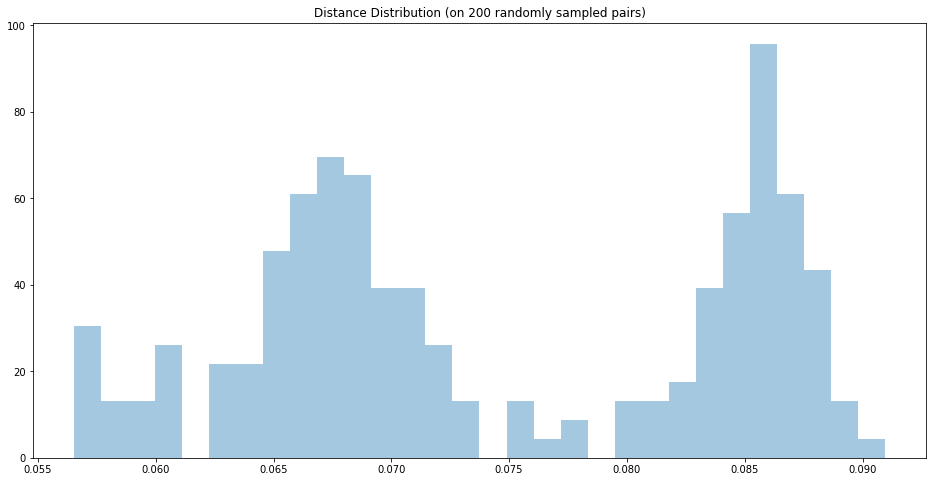

In [19]:
plt.figure(figsize=(16,8))
sns.distplot(distances1, kde=False, bins=30, norm_hist=True)
plt.title("Distance Distribution (on 200 randomly sampled pairs)")

  0%|          | 0/200 [00:00<?, ?it/s]

computing similarity between 200 random pairs...


100%|██████████| 200/200 [05:38<00:00,  1.69s/it]


Text(0.5,1,'Similarity Distribution (on 200 randomly sampled pairs)')

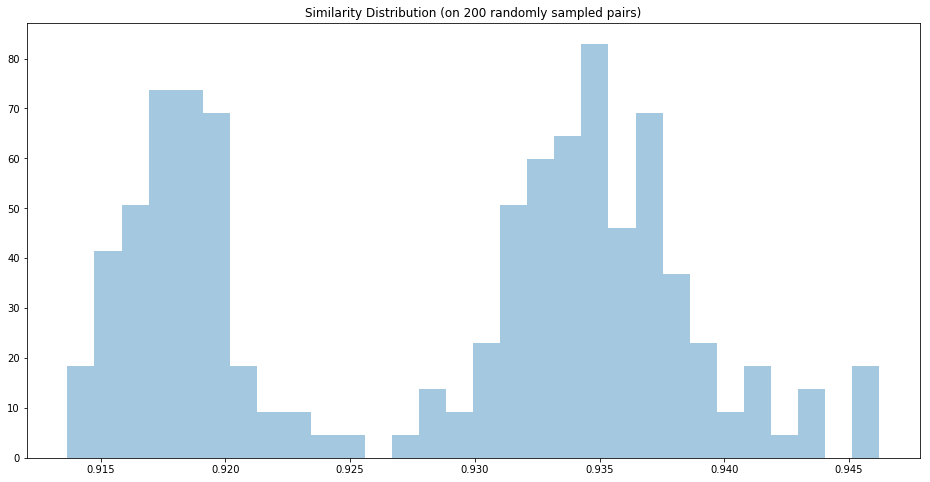

In [20]:
m = 200

similarity1 = similarityDistribRand(data1, m)

plt.figure(figsize=(16,8))
sns.distplot(similarity1, bins=30, kde=False, norm_hist=True)
plt.title("Similarity Distribution (on {} randomly sampled pairs)".format(m))

In [19]:
values, counts = np.unique(similarity1, return_counts=True)

In [20]:
values[-5:], counts[-5:]

(array([ 0.99634369,  0.99725652,  0.99817017,  0.99908467,  1.        ]),
 array([3324, 4257, 5051, 4345, 1483]))

### Parallel test

In [13]:
similarityrand, i = similarityWithFixedParallel(data1, 12)

Text(0.5,1,'Similarity Distribution relative to sequence #863')

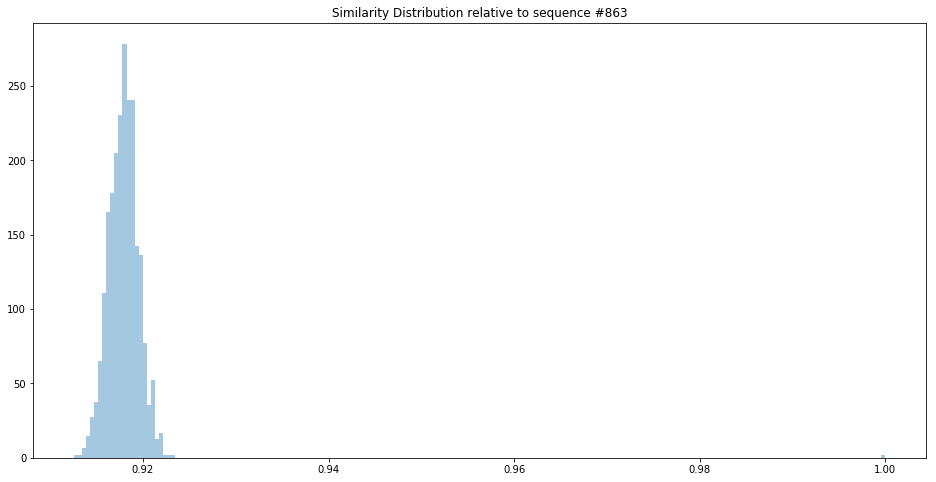

In [15]:
plt.figure(figsize=(16,8))
sns.distplot(similarityrand, bins=200, norm_hist=1, kde=0)
plt.title("Similarity Distribution relative to sequence #{}".format(i))

### Using similarities computed on the side

#### haploid1 - #121

In [7]:
simil1 = np.genfromtxt("Data/22hap1_sim_121.gz")

Text(0.5,1,'Similarity Distribution relative to sequence #121')

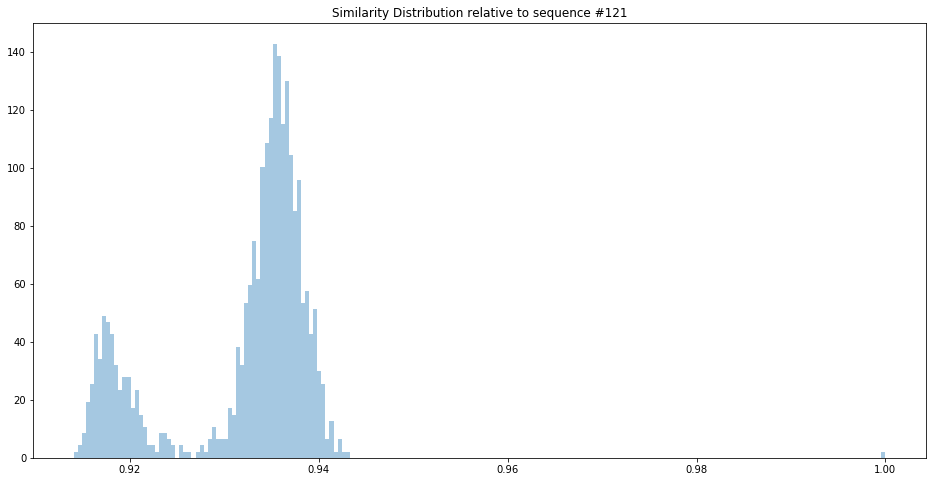

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(simil1, bins=200, norm_hist=1, kde=0)
plt.title("Similarity Distribution relative to sequence #121")

#### diploid - #622

In [43]:
simildipl = np.genfromtxt("Data/22dip_sim_622.gz")

Text(0.5,1,'Similarity Distribution relative to sequence #622 (DIPLOID)')

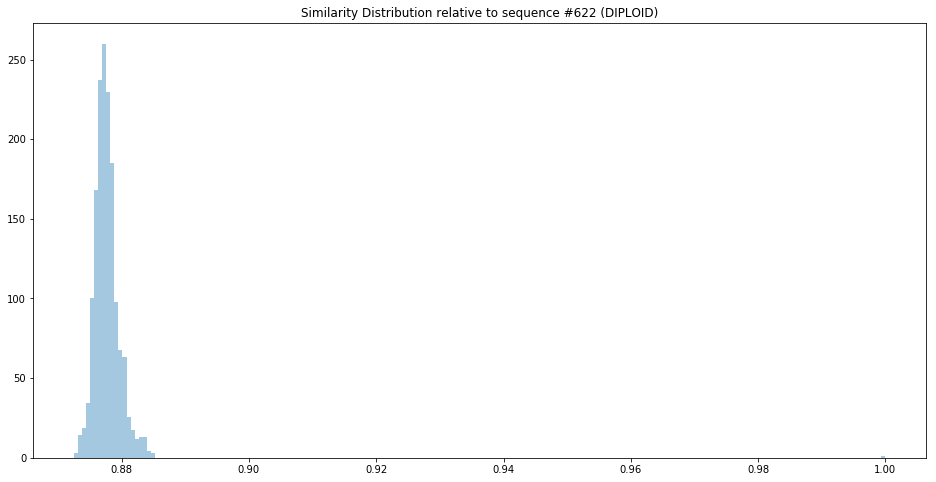

In [45]:
plt.figure(figsize=(16,8))
sns.distplot(simildipl, bins=200, norm_hist=1, kde=0)
plt.title("Similarity Distribution relative to sequence #622 (DIPLOID)")

---

### Simulating errors

In [30]:
def similarityToRef(dataset, ref):
    n, l = dataset.shape[0], dataset.shape[1]
    simil = np.zeros(n)
    
    for j in tqdm(range(n)):
        seq = dataset[j,]
        d = distance.hamming(ref, seq)
        simil[j] = (2*l - d) * 1.0 / (2*l + d)
    return simil

In [25]:
reference = np.random.randint(0,2,450000)

In [50]:
duplicates = np.zeros((500,450000), dtype=int)
for i in tqdm(range(500)):
    decision = np.random.random(450000)
    decision = decision < 0.001
    duplicates[i,] = np.abs(reference - decision)


  9%|▉         | 45/500 [00:00<00:05, 86.05it/s]
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/vbillaut/.local/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 500/500 [00:06<00:00, 78.10it/s]


In [51]:
similerrors, i = similarityToRef(duplicates, reference)

100%|██████████| 500/500 [10:27<00:00,  1.26s/it]


Text(0.5,1,'Similarity distribution of erroneous duplicates relative to reference sequence')

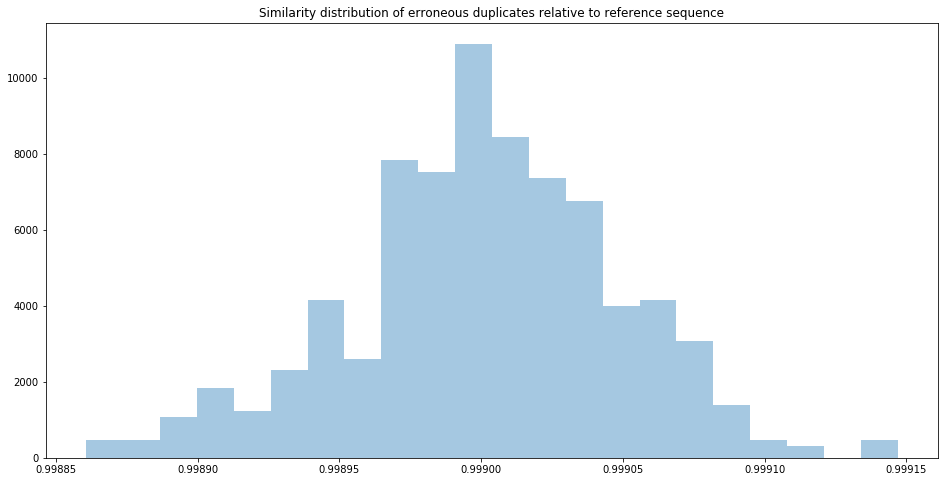

In [55]:
plt.figure(figsize=(16,8))

sns.distplot(similerrors, bins=22, norm_hist=1, kde=0)
#plt.xlim(left=0.92,right=1.005)
plt.title("Similarity distribution of erroneous duplicates relative to reference sequence")

In [5]:
with gzip.open("Data/22hap1.gz", 'rb') as f:
    for l in f:
        break
    s = l.decode('utf8')
    reference1 = np.array(list(map(float, s.split())))

In [6]:
reference1.shape

(494328,)

In [8]:
duplicates = np.zeros((500,reference1.shape[0]), dtype=int)
for i in range(500):
    if i>0 and i%100==0:
        print("step {}".format(i))
    decision = np.random.random(reference1.shape[0])
    decision = decision < 0.001
    duplicates[i,] = np.abs(reference1 - decision)
print("done.")

step 100
step 200
step 300
step 400


In [11]:
similerrors = similarityToRef(duplicates, reference1)

100%|██████████| 500/500 [13:00<00:00,  1.56s/it]


In [12]:
similhap1 = np.genfromtxt("Data/22hap1_sim_1.gz")

Text(0.5,1,'Similarity distribution and simulated erroneous duplicates for sequence 1 (haploid)')

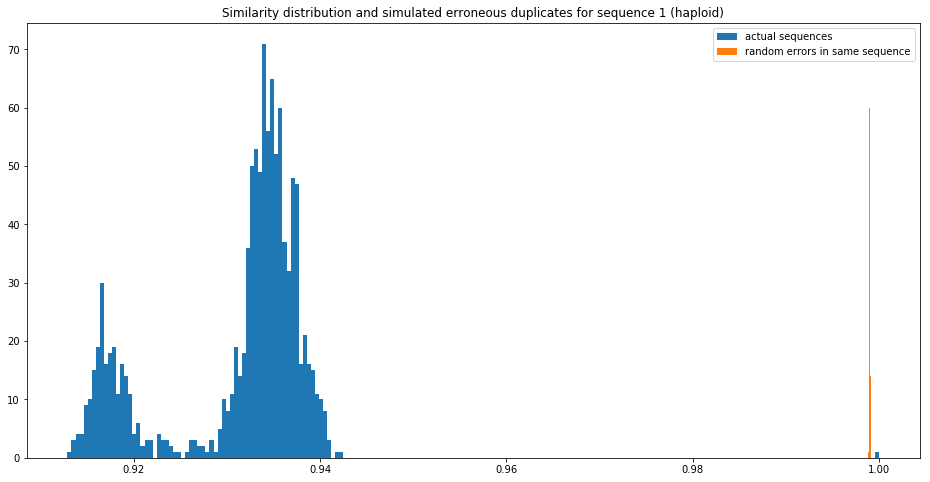

In [34]:
plt.figure(figsize=(16,8))
plt.hist(similhap1, bins=200,label="actual sequences")
plt.hist(similerrors, bins=22,label="random errors in same sequence")
# sns.kdeplot(similhap1, ax=ax)
# sns.kdeplot(similerrors, ax=ax)
plt.legend()
plt.title("Similarity distribution and simulated erroneous duplicates for sequence 1 (haploid)")

---

## LSHash

In [43]:
import nearpy


In [65]:
from nearpy.hashes import RandomDiscretizedProjections, PCADiscretizedProjections
from nearpy.distances import ManhattanDistance
from nearpy import Engine

In [69]:
DIM = data0.shape[1]
POINTS = data0.shape[0]

In [60]:
rdp = RandomDiscretizedProjections("rdp", 32, 4, rand_seed=20)
#pcadp = PCADiscretizedProjections("pcadp", 32, 4)  # missing training set

In [68]:
engine = Engine(DIM, lshashes=[rdp], distance=ManhattanDistance())

In [72]:
for i in range(POINTS):
    engine.store_vector(data0[i,], i)

ValueError: shapes (32,1092) and (494328,) not aligned: 1092 (dim 1) != 494328 (dim 0)

In [71]:
POINTS,DIM

(1092, 494328)

In [6]:
with gzip.open("Data/22hap0.gz", 'rb') as f:
    for i,l in enumerate(f):
        s = l.decode('utf-8')
        print(s)
        if i == 20:
            break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

